## Setup

In [2]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [3]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set_no_zeros.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4791 entries, 0 to 4790
Data columns (total 29 columns):
EVENT_ID              4791 non-null int64
INJURIES_DIRECT       4791 non-null int64
DEATHS_DIRECT         4791 non-null int64
DAMAGE_PROPERTY       4791 non-null float64
DAMAGE_CROPS          4791 non-null float64
DURATION_SECONDS      4791 non-null float64
BEGIN_LAT             4791 non-null float64
BEGIN_LON             4791 non-null float64
TOR_LENGTH            4791 non-null float64
TOR_WIDTH             4791 non-null float64
BEGIN_DATE_TIME       4791 non-null float64
YEAR                  4791 non-null int64
CZ_NAME               4791 non-null object
OPEN_WATER_PROP       4791 non-null float64
DEV_OPEN_PROP         4791 non-null float64
DEV_LOW_PROP          4791 non-null float64
DEV_MED_PROP          4791 non-null float64
DEV_HIGH_PROP         4791 non-null float64
DECID_FOREST_PROP     4791 non-null float64
EVERGR_FOREST_PROP    4791 non-null float64
MIXED_FOREST_PROP     

In [4]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [3]].astype(float)


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4791 entries, 0 to 4790
Data columns (total 1 columns):
DAMAGE_PROPERTY    4791 non-null float64
dtypes: float64(1)
memory usage: 37.5 KB


In [6]:
# The independent variables
tornado_features = tor_df.iloc[:, 5:]


# Get rid of year and county name
tornado_features = tornado_features.drop(["YEAR",
                                          "CZ_NAME"],
                                         axis = 1)



# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4791 entries, 0 to 4790
Data columns (total 22 columns):
DURATION_SECONDS      4791 non-null float64
BEGIN_LAT             4791 non-null float64
BEGIN_LON             4791 non-null float64
TOR_LENGTH            4791 non-null float64
TOR_WIDTH             4791 non-null float64
BEGIN_DATE_TIME       4791 non-null float64
OPEN_WATER_PROP       4791 non-null float64
DEV_OPEN_PROP         4791 non-null float64
DEV_LOW_PROP          4791 non-null float64
DEV_MED_PROP          4791 non-null float64
DEV_HIGH_PROP         4791 non-null float64
DECID_FOREST_PROP     4791 non-null float64
EVERGR_FOREST_PROP    4791 non-null float64
MIXED_FOREST_PROP     4791 non-null float64
SHRUB_SCRUB_PROP      4791 non-null float64
GRASS_LAND_PROP       4791 non-null float64
PASTURE_HAY_PROP      4791 non-null float64
CULT_CROPS_PROP       4791 non-null float64
WOOD_WETLAND_PROP     4791 non-null float64
HERB_WETLAND_PROP     4791 non-null float64
BARREN_LAND_P

In [386]:
# See the (order of) independent variables
tornado_features.head()

,DURATION_SECONDS,BEGIN_LAT,BEGIN_LON,TOR_LENGTH,TOR_WIDTH,BEGIN_DATE_TIME,LAND_COVER
0,-0.599129,1.339467,2.283863,-0.549384,-0.362512,-2.757958,0.693666
1,-0.862318,-2.015836,1.080576,-0.698797,-0.668633,-2.745200,1.856677
2,-0.862318,-1.839699,1.029284,-0.680120,-0.668633,-2.756886,-3.047584
3,-0.198816,0.865419,0.994627,-0.680120,-0.604187,-2.743933,-0.245149
4,-0.331516,1.269882,1.658653,-0.698797,-0.636410,-2.754986,0.693666


In [7]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


-4.1857e-02
-4.1161e-02
-4.2497e-02
     ⋮      
-4.1161e-02
 8.2751e-02
-4.2275e-02
[torch.DoubleTensor of size 4791x1]

In [8]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


-3.3944e-01 -7.2865e-01  9.9568e-01  ...  -2.3577e-01 -6.3537e-02 -8.5583e-03
-6.2468e-01 -3.5652e-01 -2.7929e-01  ...  -2.4592e-01  9.4128e-02 -8.5583e-03
-3.3944e-01  1.1322e+00 -7.0073e-02  ...  -1.1256e-01 -1.7514e-01 -8.5583e-03
                ...                   ⋱                   ...                
-6.2468e-01 -2.3260e-01  7.5542e-01  ...  -2.4592e-01 -1.5206e-01 -8.5583e-03
 2.3704e+00  7.5585e-01 -7.2317e-01  ...  -2.3287e-01 -1.7514e-01 -8.5583e-03
-3.3944e-01  9.2537e-01  1.7482e+00  ...   5.7597e-04  3.5189e-01 -8.5583e-03
[torch.DoubleTensor of size 4791x22]

### Convert DoubleTensor to FloatTensor

In [9]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


-3.3944e-01 -7.2865e-01  9.9568e-01  ...  -2.3577e-01 -6.3537e-02 -8.5583e-03
-6.2468e-01 -3.5652e-01 -2.7929e-01  ...  -2.4592e-01  9.4128e-02 -8.5583e-03
-3.3944e-01  1.1322e+00 -7.0073e-02  ...  -1.1256e-01 -1.7514e-01 -8.5583e-03
                ...                   ⋱                   ...                
-6.2468e-01 -2.3260e-01  7.5542e-01  ...  -2.4592e-01 -1.5206e-01 -8.5583e-03
 2.3704e+00  7.5585e-01 -7.2317e-01  ...  -2.3287e-01 -1.7514e-01 -8.5583e-03
-3.3944e-01  9.2537e-01  1.7482e+00  ...   5.7597e-04  3.5189e-01 -8.5583e-03
[torch.FloatTensor of size 4791x22]

## Round 1: One-Hidden-Layer Neural Network

In [10]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [11]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 1))

In [12]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [13]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 4e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and print current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    print(t, loss.data[0])
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 13365.3037109375
1 13328.6484375
2 13296.0810546875
3 13266.7265625
4 13240.2109375
5 13217.2861328125
6 13196.025390625
7 13176.24609375
8 13157.6884765625
9 13140.3349609375
10 13123.8544921875
11 13108.17578125
12 13093.18359375
13 13078.8095703125
14 13064.9775390625
15 13051.6689453125
16 13038.759765625
17 13026.2470703125
18 13014.0986328125
19 13002.3349609375
20 12991.0478515625
21 12980.150390625
22 12969.494140625
23 12959.513671875
24 12950.0947265625
25 12940.90234375
26 12931.921875
27 12923.109375
28 12914.44140625
29 12905.9150390625
30 12897.5625
31 12889.384765625
32 12881.3642578125
33 12873.5029296875
34 12865.7021484375
35 12858.0634765625
36 12850.6044921875
37 12843.451171875
38 12836.4384765625
39 12829.515625
40 12822.6884765625
41 12816.037109375
42 12809.4375
43 12802.9716796875
44 12796.58203125
45 12790.271484375
46 12784.0712890625
47 12777.9716796875
48 12771.9677734375
49 12766.01953125
50 12760.2236328125
51 12754.5029296875
52 12748.8603515625
53 127

In [14]:
# Get the iterations
iterations = list(range(0, 10000))

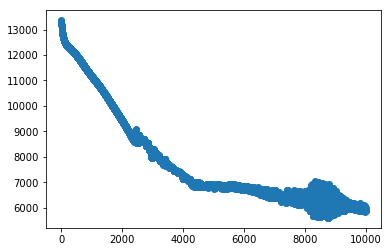

In [15]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [16]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(4791)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [17]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(4791)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

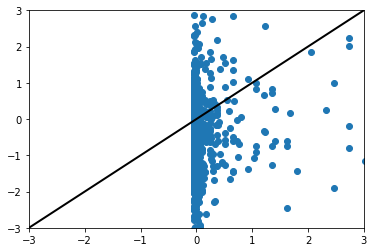

In [18]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [21]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set_no_zeros.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [3]].astype(float)


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)

In [25]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 5:]

valid_predictors = valid_predictors.drop(["YEAR",
                                          "CZ_NAME"],
                                         axis = 1)


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)

In [26]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight


# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 6111.4385
[torch.FloatTensor of size 1]

In [27]:
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 22 columns):
DURATION_SECONDS      1623 non-null float64
BEGIN_LAT             1623 non-null float64
BEGIN_LON             1623 non-null float64
TOR_LENGTH            1623 non-null float64
TOR_WIDTH             1623 non-null float64
BEGIN_DATE_TIME       1623 non-null float64
OPEN_WATER_PROP       1623 non-null float64
DEV_OPEN_PROP         1623 non-null float64
DEV_LOW_PROP          1623 non-null float64
DEV_MED_PROP          1623 non-null float64
DEV_HIGH_PROP         1623 non-null float64
DECID_FOREST_PROP     1623 non-null float64
EVERGR_FOREST_PROP    1623 non-null float64
MIXED_FOREST_PROP     1623 non-null float64
SHRUB_SCRUB_PROP      1623 non-null float64
GRASS_LAND_PROP       1623 non-null float64
PASTURE_HAY_PROP      1623 non-null float64
CULT_CROPS_PROP       1623 non-null float64
WOOD_WETLAND_PROP     1623 non-null float64
HERB_WETLAND_PROP     1623 non-null float64
BARREN_LAND_P

In [28]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(1623)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [29]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(1623)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

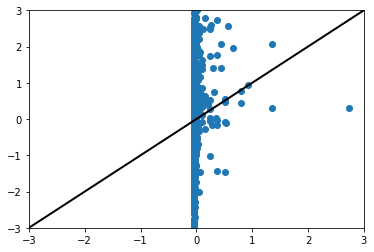

In [30]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

### Round 1.2: The Model Above has Proven Best; Final Plot against Test Data

In [37]:
# Import data
test_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_test_set_no_zeros.csv")


# Validation set outcomes
test_outcomes = test_df.iloc[:, [3]].astype(float)


# Make the validation outcomes into a numpy array
test_outcomes_array = test_outcomes.values


# Makes the numpy array into a torch Tensor
test_outcomes_Tensor = torch.from_numpy(test_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
test_outcomes_Tensor = test_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_outcomes_Variable = Variable(test_outcomes_Tensor)

In [38]:
# Validation set predictors
test_predictors = test_df.iloc[:, 5:]

test_predictors = test_predictors.drop(["YEAR",
                                        "CZ_NAME"],
                                       axis = 1)


# Make the validation predictors into a numpy array
test_predictors_array = test_predictors.values


# Makes the numpy array into a torch Tensor
test_predictors_Tensor = torch.from_numpy(test_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
test_predictors_Tensor = test_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_predictors_Variable = Variable(test_predictors_Tensor)

In [39]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model_2 = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(15, 1))


# Give the new model the old model's parameters
dim_corrected_model_2[(0)].weight = model[(0)].weight
dim_corrected_model_2[(2)].weight = model[(2)].weight


# Get the validation set predictions
y_test_pred = dim_corrected_model_2(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 6996.5825
[torch.FloatTensor of size 1]

In [40]:
test_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 22 columns):
DURATION_SECONDS      1546 non-null float64
BEGIN_LAT             1546 non-null float64
BEGIN_LON             1546 non-null float64
TOR_LENGTH            1546 non-null float64
TOR_WIDTH             1546 non-null float64
BEGIN_DATE_TIME       1546 non-null float64
OPEN_WATER_PROP       1546 non-null float64
DEV_OPEN_PROP         1546 non-null float64
DEV_LOW_PROP          1546 non-null float64
DEV_MED_PROP          1546 non-null float64
DEV_HIGH_PROP         1546 non-null float64
DECID_FOREST_PROP     1546 non-null float64
EVERGR_FOREST_PROP    1546 non-null float64
MIXED_FOREST_PROP     1546 non-null float64
SHRUB_SCRUB_PROP      1546 non-null float64
GRASS_LAND_PROP       1546 non-null float64
PASTURE_HAY_PROP      1546 non-null float64
CULT_CROPS_PROP       1546 non-null float64
WOOD_WETLAND_PROP     1546 non-null float64
HERB_WETLAND_PROP     1546 non-null float64
BARREN_LAND_P

In [41]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(1546)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*2.715953 + 15.09311


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

In [42]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
test_outcomes_Variable_resized = test_outcomes_Variable.resize(1546)


# Make the FloatTensor into a numpy.array
test_outcomes_array = test_outcomes_Variable_resized.data.numpy()


# Convert back to native units and scale
test_outcomes_array = test_outcomes_array*2.715953 + 15.09311


# Make the numpy.array into a list
test_outcomes_list = test_outcomes_array.tolist()

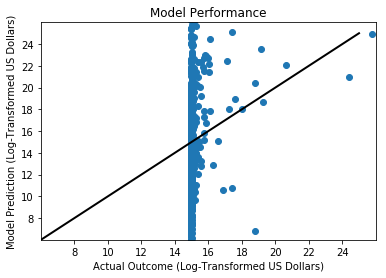

In [43]:
# Plot new predictions versus new data outcomes

plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([6, 26])

axes.set_ylim([6, 26])

axes.set_xticks([8, 10, 12, 14, 16, 18, 20, 22, 24])

axes.set_yticks([8, 10, 12, 14, 16, 18, 20, 22, 24])

plt.plot([5, 25], [5, 25], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [44]:
dim_corrected_model_2[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.2100  0.2213 -0.2635 -0.1952 -0.5106  0.1988 -0.0265  0.5980  0.2518  0.0542
 0.0421 -0.0757 -0.1058  0.0629  0.5674  0.2020  0.0380  0.1468  0.2126 -0.0679
 0.1846  0.4800 -0.5042  0.0248 -0.3442  0.8401  0.1315  0.8431  1.0359  0.8802
 0.0937  0.2320 -0.1258  0.1069  0.0854  0.2396 -0.1187  0.8694  0.4434 -0.1401
-0.0174 -0.0837  0.1098  0.1798 -0.9069  0.0233  0.3886 -0.1732 -0.2486  0.0181
 0.0450 -0.2031 -0.0263 -0.0091 -0.4911 -0.0793  0.1862 -0.3373 -0.2388  0.0879
-0.5207  0.5239 -0.3179 -0.6583  2.6077 -0.4421 -0.3462  0.2297  0.1375 -0.0859
-0.5664 -0.1988  0.0526 -0.1601  1.0291 -0.2161  0.2222  0.0102 -0.2444 -0.1561
-0.5611 -0.3452  0.2495 -0.4908  0.4257 -0.3603 -0.3044  0.3166 -0.3610 -0.7109
-0.9760 -0.4158  0.2945 -0.5908  1.2303 -0.4884 -0.2315  0.3438 -0.4135 -0.9412
 0.1651  0.4027 -0.4516  0.2222  0.1875  0.7743  0.1780  0.7457  0.9597  0.8598
 0.2952  0.1713 -0.0109  0.1872 -0.2514  0.2918  0.0293  0.3860  0.4384 -0.0019
-

In [45]:
dim_corrected_model_2[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.9026  1.4683 -1.9254 -0.7236 -1.0250  0.6157  3.2709  0.9274  1.7473 -1.9373

Columns 10 to 14 
 1.8159  0.7953 -3.4874  0.8602 -0.6850
[torch.FloatTensor of size 1x15]

## Round 2: Two-Hidden-Layer Neural Network

In [46]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [47]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 1))

In [48]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 6e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and print current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    print(t, loss.data[0])
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 13395.9560546875
1 13351.576171875
2 13313.126953125
3 13279.8603515625
4 13250.9775390625
5 13225.900390625
6 13204.0888671875
7 13185.08203125
8 13168.4970703125
9 13153.921875
10 13141.1171875
11 13129.697265625
12 13119.5830078125
13 13110.470703125
14 13102.345703125
15 13095.1640625
16 13088.595703125
17 13082.5693359375
18 13077.0361328125
19 13071.869140625
20 13067.037109375
21 13062.4990234375
22 13058.166015625
23 13053.962890625
24 13049.9833984375
25 13046.083984375
26 13042.3291015625
27 13038.650390625
28 13034.9990234375
29 13031.421875
30 13027.87890625
31 13024.3447265625
32 13020.8154296875
33 13017.2666015625
34 13013.7119140625
35 13010.2001953125
36 13006.6328125
37 13003.091796875
38 12999.5458984375
39 12995.9521484375
40 12992.3369140625
41 12988.70703125
42 12985.0166015625
43 12981.3125
44 12977.5458984375
45 12973.7744140625
46 12969.9296875
47 12966.10546875
48 12962.23046875
49 12958.2998046875
50 12954.3173828125
51 12950.3232421875
52 12946.3046875
53 

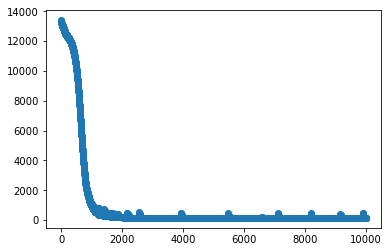

In [49]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [51]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(4791)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

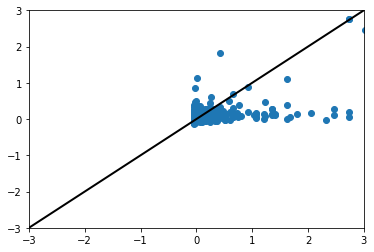

In [52]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [53]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 10),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(10, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight


# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 8126.1328
[torch.FloatTensor of size 1]

In [55]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(1623)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

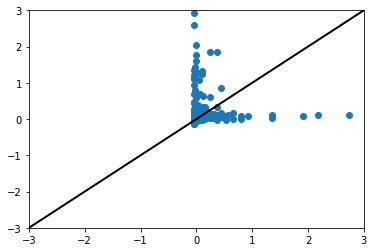

In [56]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

## Round 3: Three-Hidden-Layers Neural Network

In [57]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [58]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 1))

In [59]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and print current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    print(t, loss.data[0])
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 13190.9111328125
1 13185.060546875
2 13179.853515625
3 13175.208984375
4 13171.103515625
5 13167.373046875
6 13164.048828125
7 13161.04296875
8 13158.32421875
9 13155.8544921875
10 13153.5615234375
11 13151.5322265625
12 13149.6416015625
13 13147.9130859375
14 13146.310546875
15 13144.802734375
16 13143.458984375
17 13142.193359375
18 13140.95703125
19 13139.8046875
20 13138.7353515625
21 13137.7548828125
22 13136.7998046875
23 13135.861328125
24 13134.962890625
25 13134.1279296875
26 13133.314453125
27 13132.5283203125
28 13131.7939453125
29 13131.048828125
30 13130.2939453125
31 13129.595703125
32 13128.9296875
33 13128.2431640625
34 13127.5927734375
35 13126.9306640625
36 13126.33203125
37 13125.70703125
38 13125.11328125
39 13124.5380859375
40 13124.005859375
41 13123.5380859375
42 13123.1337890625
43 13122.7099609375
44 13122.3251953125
45 13121.9228515625
46 13121.5341796875
47 13121.1474609375
48 13120.7470703125
49 13120.3564453125
50 13119.953125
51 13119.5712890625
52 13119

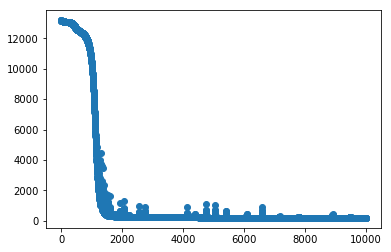

In [60]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [61]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(4791)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

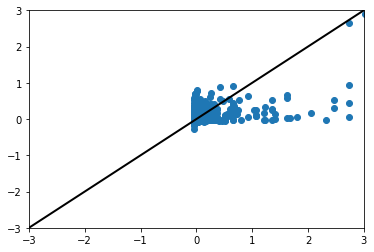

In [62]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [63]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 10),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(10, 7),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(7, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight


# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 10866.8818
[torch.FloatTensor of size 1]

In [64]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(1623)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

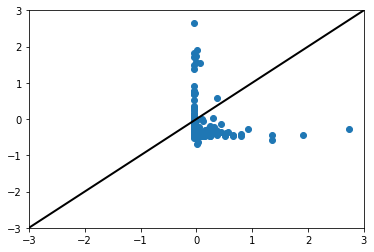

In [65]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

## Round 4: Linear Regression

In [67]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [68]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(22, 1))

In [69]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 4e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and print current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    print(t, loss.data[0])
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 14522.2890625
1 14132.3369140625
2 13843.2841796875
3 13626.40234375
4 13461.345703125
5 13333.74609375
6 13233.5341796875
7 13153.3828125
8 13088.267578125
9 13034.3515625
10 12989.0615234375
11 12950.43359375
12 12917.0126953125
13 12887.794921875
14 12861.919921875
15 12838.869140625
16 12818.1689453125
17 12799.3603515625
18 12782.29296875
19 12766.7060546875
20 12752.373046875
21 12739.173828125
22 12726.9794921875
23 12715.7021484375
24 12705.2119140625
25 12695.48046875
26 12686.361328125
27 12677.880859375
28 12669.94921875
29 12662.4775390625
30 12655.5234375
31 12648.9892578125
32 12642.85546875
33 12637.0859375
34 12631.599609375
35 12626.498046875
36 12621.6337890625
37 12617.0703125
38 12612.7314453125
39 12608.6396484375
40 12604.783203125
41 12601.107421875
42 12597.6279296875
43 12594.3291015625
44 12591.1806640625
45 12588.2001953125
46 12585.3583984375
47 12582.681640625
48 12580.099609375
49 12577.6669921875
50 12575.3466796875
51 12573.1337890625
52 12570.9609375


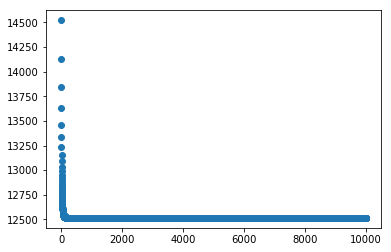

In [70]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [71]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(4791)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

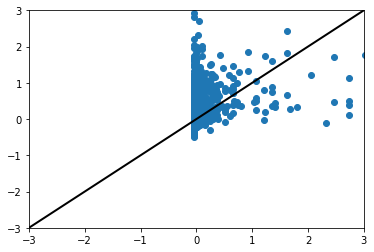

In [72]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [73]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight


# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 544.1622
[torch.FloatTensor of size 1]

In [74]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(1623)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

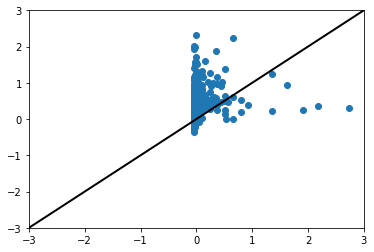

In [75]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)